In [215]:
# coding: utf-8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'data/도로교통공단_시도 시군구별 교통사고(2019).csv'
traffic_accident = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옴
print(traffic_accident.info())
traffic_accident.head(229)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      229 non-null    object
 1   시군구     229 non-null    object
 2   사고건수    229 non-null    int64 
 3   사망자수    229 non-null    int64 
 4   중상자수    229 non-null    int64 
 5   경상자수    229 non-null    int64 
 6   부상신고자수  229 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 12.6+ KB
None


,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,1133,6,312,1075,172
1,서울,중구,1184,5,365,1083,167
2,서울,용산구,1187,10,316,1228,70
3,서울,성동구,1091,13,294,1063,82
4,서울,동대문구,1565,15,507,1340,141
...,...,...,...,...,...,...,...
224,울산,남구,1383,9,491,1299,135
225,울산,동구,628,1,211,588,18
226,울산,북구,693,13,282,731,97
227,울산,울주군,906,27,350,899,124


In [216]:
traffic_accident.describe()

,사고건수,사망자수,중상자수,경상자수,부상신고자수
count,229.000000,229.000000,229.000000,229.000000,229.000000
mean,1002.620087,14.624454,315.746725,1072.157205,104.288210
std,966.649622,10.219027,265.698973,1087.961506,131.940826
min,18.000000,0.000000,19.000000,29.000000,0.000000
25%,266.000000,7.000000,119.000000,259.000000,16.000000
50%,716.000000,12.000000,255.000000,740.000000,50.000000
75%,1383.000000,19.000000,402.000000,1366.000000,149.000000
max,4949.000000,62.000000,1551.000000,6097.000000,773.000000


In [217]:
# '사고건수', '사망자수' 두 피처간의 상관계수를 계산한다.
# pearson은 상관계수를 구하는 계산 방법 중 하나를 의미하며, 가장 널리 쓰인다.
acci = traffic_accident[['사고건수', '사망자수']].corr(method = 'pearson')
print(acci)

          사고건수      사망자수
사고건수  1.000000  0.635544
사망자수  0.635544  1.000000


In [218]:
# 피처간의 상관계수 행렬을 구한다.
cols = ['사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']
acci = traffic_accident[cols].corr(method = 'pearson')
print(acci)

            사고건수      사망자수      중상자수      경상자수    부상신고자수
사고건수    1.000000  0.635544  0.954238  0.989015  0.854054
사망자수    0.635544  1.000000  0.734387  0.635069  0.470466
중상자수    0.954238  0.734387  1.000000  0.925322  0.799593
경상자수    0.989015  0.635069  0.925322  1.000000  0.817696
부상신고자수  0.854054  0.470466  0.799593  0.817696  1.000000


사고건수와 중상자수의 상관계수가 가장 높다는 것을 알 수 있다.

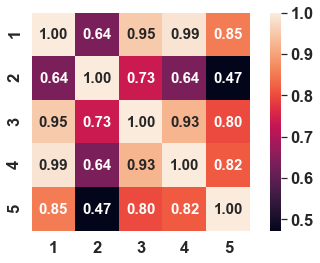

1:사고건수, 2:사망자수, 3:중상자수, 4:경상자수, 5:부상신고자수


In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr 행렬 히트맵을 시각화한다.
cols_view = ['1', '2', '3', '4', '5'] # 그래프 출력을 위한 cols 이름 축약
sns.set(font_scale=1.5)
hm = sns.heatmap(acci.values,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=cols_view,
                xticklabels=cols_view)
                
plt.tight_layout()
plt.show()
print('1:사고건수, 2:사망자수, 3:중상자수, 4:경상자수, 5:부상신고자수')

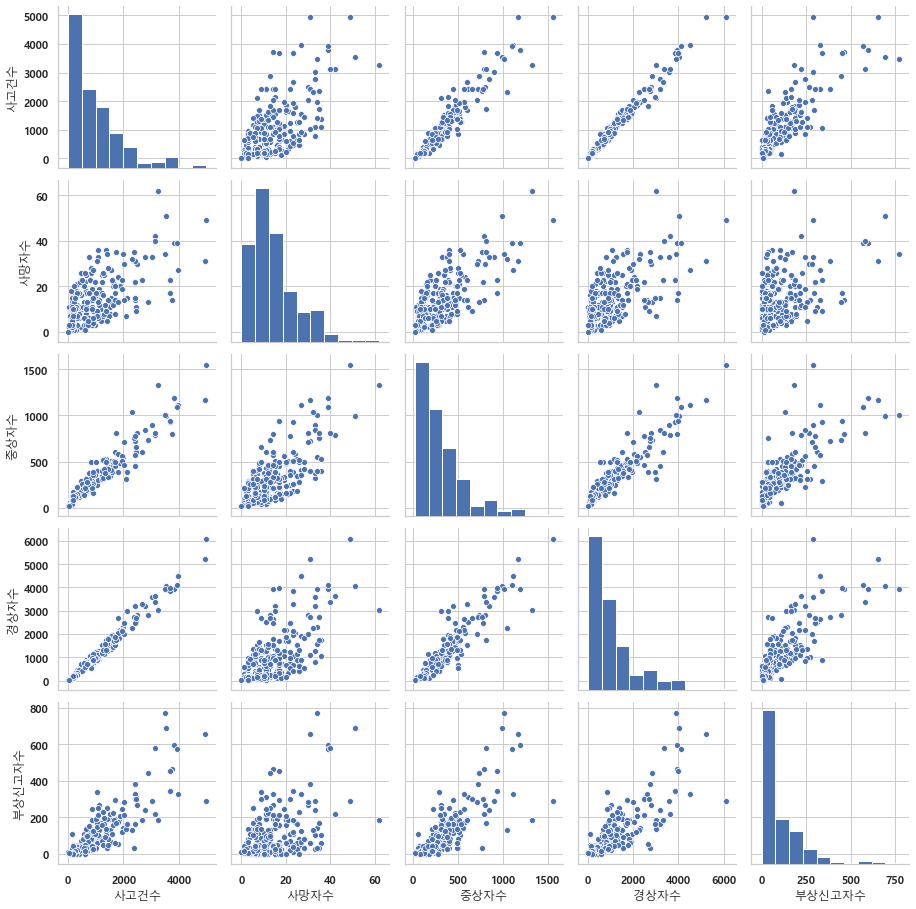

In [220]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력한다.
sns.set(font="Malgun Gothic",style='whitegrid', context='notebook')
sns.pairplot(traffic_accident[['사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수']], height=2.5)
plt.show()

In [221]:
# 결측 데이터 확인
print(traffic_accident.isnull().sum())
print("---------------------")
print(traffic_accident.dtypes)

시도        0
시군구       0
사고건수      0
사망자수      0
중상자수      0
경상자수      0
부상신고자수    0
dtype: int64
---------------------
시도        object
시군구       object
사고건수       int64
사망자수       int64
중상자수       int64
경상자수       int64
부상신고자수     int64
dtype: object


In [222]:
# matplotlib 불러오고 한글폰트 설정
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

결측값이 없다는 것을 알 수 있다.

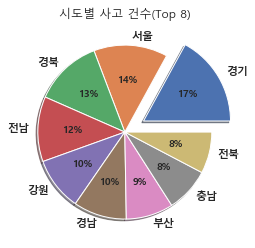

In [224]:
# 파이 차트 시각화 : plt.pie() 함수 사용
labels = traffic_accident['시도'].value_counts().index.tolist()[:9]
fracs1 = traffic_accident['시도'].value_counts().values.tolist()[:9]
explode = (0.25 , 0, 0, 0, 0, 0, 0, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('시도별 사고 건수(Top 8)')
plt.show()

In [129]:
# 시도별 사고건수 평균,최소, 최대, 합계를 계산한다.
result = traffic_accident.groupby('시도').사고건수.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
시도,,,,
강원,419.666667,88,1985,7554
경기,1789.129032,196,4920,55463
경남,712.777778,143,3245,12830
경북,636.869565,18,2777,14648
광주,1633.800000,604,2430,8169


In [130]:
# 전체 평균보다 사고건수가 많은 시도를 구한다.
total_mean = traffic_accident.사고건수.mean()
city_mean = traffic_accident.groupby('시도')['사고건수'].mean()
city_over_mean = city_mean[city_mean >= total_mean]
print(city_over_mean)

시도
경기    1789.129032
광주    1633.800000
대구    1817.000000
대전    1667.400000
서울    1570.320000
제주    2206.000000
Name: 사고건수, dtype: float64


In [131]:
# 평균 사고건수가 가장 높은 시,도를 구한다.
accident_city = traffic_accident.groupby('시도').사고건수.mean().idxmax()
print(accident_city)

제주


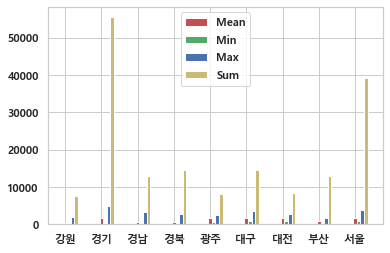

In [139]:
# 시도별 사고건수의 평균, 최소, 최대, 합계를 시각화한다.
n_groups = len(result.index[0:9])
means = result['mean'].tolist()[0:9]
mins = result['min'].tolist()[0:9]
maxs = result['max'].tolist()[0:9]
sums = result['sum'].tolist()[0:9]

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width,
                color='r',
                label='Mean')

rects2 = plt.bar(index + bar_width, mins, bar_width,
                color='g',
                label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                color='b',
                label='Max')

rects4 = plt.bar(index + bar_width * 3, sums, bar_width,
                color='y',
                label='Sum')

plt.xticks(index, result.index.tolist()[0:9])
plt.legend()
plt.show()

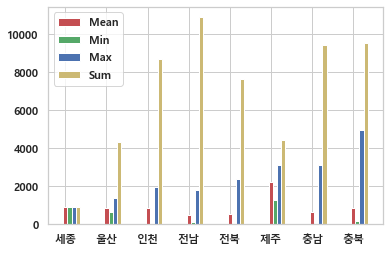

In [138]:
# 시도별 사고건수의 평균, 최소, 최대, 합계를 시각화한다.
n_groups = len(result.index[9:])
means = result['mean'].tolist()[9:]
mins = result['min'].tolist()[9:]
maxs = result['max'].tolist()[9:]
sums = result['sum'].tolist()[9:]

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width,
                color='r',
                label='Mean')

rects2 = plt.bar(index + bar_width, mins, bar_width,
                color='g',
                label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                color='b',
                label='Max')

rects4 = plt.bar(index + bar_width * 3, sums, bar_width,
                color='y',
                label='Sum')

plt.xticks(index, result.index.tolist()[9:])
plt.legend()
plt.show()

In [137]:
result.index

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='시도')

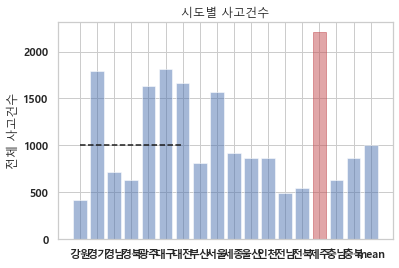

In [213]:
# 시도별 전체 사고건수를 시각화 한다.
city = city_mean.index.tolist()
city.append('mean')
x_pos = np.arange(len(city))
accident = city_mean.tolist()
accident.append(total_mean)

bar_list = plt.bar(x_pos, accident, align='center', alpha=0.5)
bar_list[len(city) -4].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, city)

plt.ylabel('전체 사고건수')
plt.title('시도별 사고건수')

plt.show()

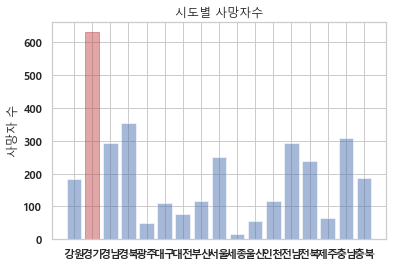

In [134]:
# 시도별 사망자수를 시각화한다.
death_group = traffic_accident.groupby('시도')['사망자수'].sum()
city = death_group.index.tolist()
y_pos = np.arange(len(city))
death = death_group.tolist()

bar_list = plt.bar(y_pos, death, align='center', alpha=0.5)
bar_list[city.index("경기")].set_color('r')
plt.xticks(y_pos, city)
plt.ylabel('사망자 수')
plt.title('시도별 사망자수')

plt.show()

scipy를 사용한 t-test검정

In [141]:
# 경기와 제주의 사고건수 차이를 검정한다.
gyeonggi = traffic_accident.loc[traffic_accident['시도']=='경기']
jeju = traffic_accident.loc[traffic_accident['시도']=='제주']

from scipy import stats
tTestResult = stats.ttest_ind(gyeonggi['사고건수'], jeju['사고건수'])
tTestResultDiffVar = stats.ttest_ind(gyeonggi['사고건수'], jeju['사고건수'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -0.424 and 0.674.
The t-statistic and p-value not assuming equal variances is -0.432 and 0.733


In [211]:
# '경상자수에 대한 중상자수'에 대한 탐색 코드

# 경상자수에 대한 중상자수에 대한 피처를 생성한다.
# traffic_accident['중상자비율'] = traffic_accident['중상자수'] / traffic_accident['경상자수']

traffic_accident['중상자비율'] = traffic_accident.groupby('시도').중상자수.agg('sum') / traffic_accident.groupby('시도').경상자수.agg('sum')
traffic_accident['중상자비율'] = traffic_accident['중상자비율'].fillna(0)


# 순위 정보를 생성한다.
rate_list = traffic_accident.groupby('시도').중상자수.agg('sum') / traffic_accident.groupby('시도').경상자수.agg('sum').tolist()
city_with_rank = rate_list.to_frame().sort_values(by=['중상자수'], ascending=0)
city_with_rank.rename(columns = {'중상자수' : '중상자수/경상자수'}, inplace = True)
city_with_rank.head(5)

,중상자수/경상자수
시도,
경남,0.518688
세종,0.427772
충남,0.407891
경북,0.379251
울산,0.374145
